# Big Data Mart Sales Problem

Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train_data.shape , test.shape

((8523, 12), (5681, 11))

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Check for null
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We see that there are null values in Item_Weight and Outlet_Size columns

In [7]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Count', '% of Missing Data'])
missing_data.head(5)

,Total Count,% of Missing Data
Outlet_Size,2410,28.3
Item_Weight,1463,17.2
Item_Identifier,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0


So, we have lots of missing data in Outlet_Size and Item_weight

# Check for Duplicates

In [8]:
duplicate = train_data[train_data.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


No Dpulicate record is found

In [9]:
train_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


# Data Description

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier- It is the Unique product ID

Item_Weight- It is the Weight of product

Item_Fat_Content - It describes if the product is low fat or not

Item_Visibility - The peercentage of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year- The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type- The type of city in which the store is located

Outlet_Type- Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be predicted.

Also we notice that below columns are categorical columns which we need to convert.

            'Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type' 
            and 'Item_Fat_Content' 
 

In [10]:
# Lets see number of distinct observations over requested axis
train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

We see that  Item_Fat_Content has 5 unique values, Item_Type has 16 unique values, Outlet_Identifier has 10 unique values.

There are 9 Outlet_Establishment_Year, three Outlet_Size (small,medium and high), three Outlet_Location_Type and 4 Outlet Type.

Other columns are not that unique

# Evaluating the Categorical Features

In [11]:
print('Frequency of Categories for Item Identifier')
id_counts = train_data['Item_Identifier'].value_counts()
id_counts.head()

Frequency of Categories for Item Identifier


FDG33    10
FDW13    10
FDV60     9
FDD38     9
NCQ06     9
Name: Item_Identifier, dtype: int64

In [12]:
print('Frequency of Categories for Item_Fat_Content')
id_counts = train_data['Item_Fat_Content'].value_counts()
id_counts

Frequency of Categories for Item_Fat_Content


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

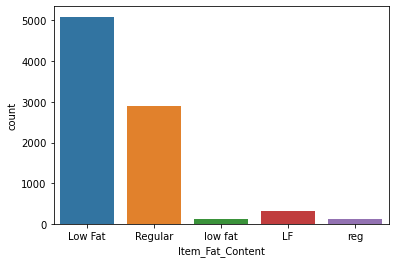

In [13]:
sns.countplot(train_data.Item_Fat_Content)

We see that Low Fat , low fat and LF are same names so lets rename it to Low Fat.

Also, Regular and re are same , so lets rename them to Regular

In [14]:
import re
updated_fatContent = {"Low Fat": "Low Fat", "Regular": "Regular", "low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}
data = [train_data]

for dataset in data:
    dataset['Item_Fat_Content1'] = dataset['Item_Fat_Content'].map(updated_fatContent)

In [15]:
id_counts = train_data['Item_Fat_Content1'].value_counts()
id_counts

Low Fat    5517
Regular    3006
Name: Item_Fat_Content1, dtype: int64

In [16]:
train_data=train_data.drop(['Item_Fat_Content'], axis=1)

In [17]:
train_data.rename(columns={"Item_Fat_Content1": "Item_Fat_Content"}, errors="raise",inplace=True)

In [18]:
train_data.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Fat
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Regular


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

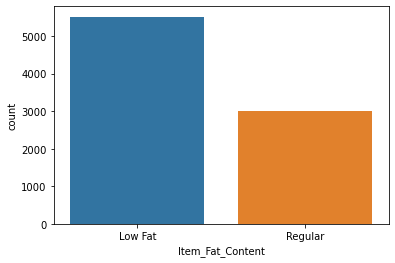

In [19]:
sns.countplot(train_data.Item_Fat_Content)

In [20]:
print('Frequency of Categories for Item Type')
id_counts = train_data['Item_Type'].value_counts()
id_counts

Frequency of Categories for Item Type


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

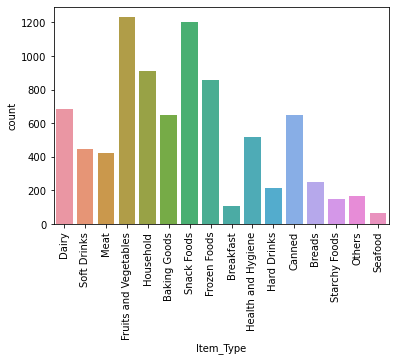

In [21]:
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

In [22]:
# Check which Item_Type has how many Item_Fat_Content
Item_Type_and_fat_counts = train_data.groupby(["Item_Fat_Content","Item_Type"]).size()
(Item_Type_and_fat_counts)

Item_Fat_Content  Item_Type            
Low Fat           Baking Goods             329
                  Breads                   140
                  Breakfast                 41
                  Canned                   341
                  Dairy                    418
                  Frozen Foods             450
                  Fruits and Vegetables    630
                  Hard Drinks              214
                  Health and Hygiene       520
                  Household                910
                  Meat                     170
                  Others                   169
                  Seafood                   37
                  Snack Foods              692
                  Soft Drinks              374
                  Starchy Foods             82
Regular           Baking Goods             319
                  Breads                   111
                  Breakfast                 69
                  Canned                   308
                  Da

In [23]:
print('Frequency of Categories for Outlet Identifier')
id_counts = train_data['Outlet_Identifier'].value_counts()
id_counts

Frequency of Categories for Outlet Identifier


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [24]:
print('Frequency of Categories for Outlet Size')
id_counts = train_data['Outlet_Size'].value_counts()
id_counts

Frequency of Categories for Outlet Size


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
print('Frequency of Categories for Outlet Location Type')
id_counts = train_data['Outlet_Location_Type'].value_counts()
id_counts

Frequency of Categories for Outlet Location Type


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [26]:
print('Frequency of Categories for Outlet Type')
id_counts = train_data['Outlet_Type'].value_counts()
id_counts

Frequency of Categories for Outlet Type


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

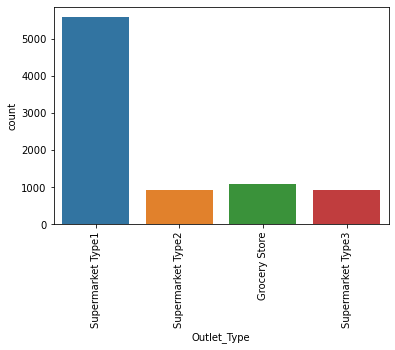

In [27]:
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=90)

In [28]:
Outlet_Location_Type_counts = train_data.groupby(["Outlet_Location_Type","Outlet_Identifier","Outlet_Type"]).size()
print(Outlet_Location_Type_counts)

Outlet_Location_Type  Outlet_Identifier  Outlet_Type      
Tier 1                OUT019             Grocery Store        528
                      OUT046             Supermarket Type1    930
                      OUT049             Supermarket Type1    930
Tier 2                OUT017             Supermarket Type1    926
                      OUT035             Supermarket Type1    930
                      OUT045             Supermarket Type1    929
Tier 3                OUT010             Grocery Store        555
                      OUT013             Supermarket Type1    932
                      OUT018             Supermarket Type2    928
                      OUT027             Supermarket Type3    935
dtype: int64


In [29]:
Outlet_Location_Type_counts = train_data.groupby(["Outlet_Type","Outlet_Size"]).size()
print(Outlet_Location_Type_counts)

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64


# Dealing with Null values

In [30]:
train_data.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Fat
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Regular


# Filling Item Weight

In [31]:
missingItemWeight = train_data[train_data['Item_Weight'].isnull()]
a=missingItemWeight.groupby(["Outlet_Type","Outlet_Identifier","Outlet_Size"]).size()
a

Outlet_Type        Outlet_Identifier  Outlet_Size
Grocery Store      OUT019             Small          528
Supermarket Type3  OUT027             Medium         935
dtype: int64

In [32]:
train_data.groupby('Outlet_Size', as_index=False)['Item_Weight'].mean()

,Outlet_Size,Item_Weight
0,High,13.006148
1,Medium,12.895420
2,Small,12.848075


If the weight would have been different for Small and Medium Outlet_Size, then we would have filled it with the mean of Small Outlet_Size and medium Outlet_Size. BUt here the mean of Small and medium Outlet Size is almost same, so lets take mean of the Item_Weight

In [33]:
train_data.Item_Weight = train_data.Item_Weight.fillna(train_data.Item_Weight.mean())

In [34]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Fat_Content                0
dtype: int64

Now we dont have any null records in Item_Weight

# Filling Outlet_Size

In [35]:
missingOutletSize = train_data[train_data['Outlet_Size'].isnull()]
missingOutletSize

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content
3,FDX07,19.200,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Regular
8,FDH17,16.200,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,Regular
9,FDU28,19.200,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,Regular
25,NCD06,13.000,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,Low Fat
28,FDE51,5.925,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688,Low Fat
8508,FDW31,11.350,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646,Regular
8509,FDG45,8.100,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804,Low Fat
8514,FDA01,15.000,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232,Regular


In [36]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

There seems to be no direct relation for filling Outlet Size, so we can fix it with the value which occurs the most, in this case it is Medium

In [37]:
train_data.Outlet_Size = train_data.Outlet_Size.fillna('Medium')

In [38]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Count', '% of Missing Data'])
missing_data.head(5)

,Total Count,% of Missing Data
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0


Now we dont have anything missing. All null values have been handled successfully

In [39]:
train_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

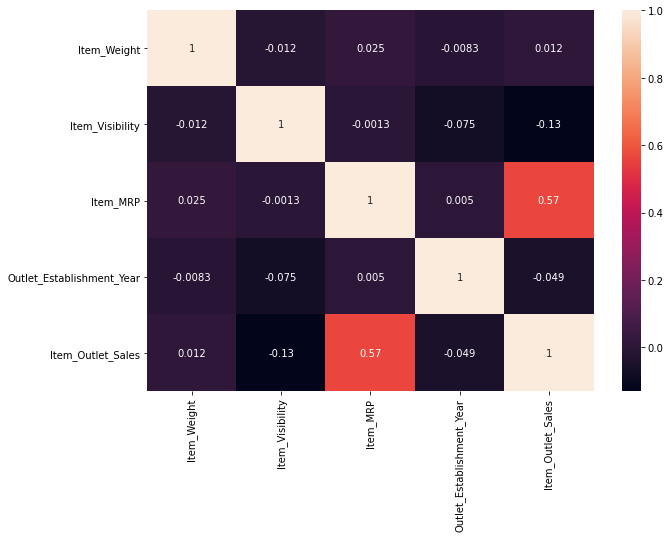

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(),annot=True)

There seems to be only a small correlation between Item_MRP and Item_Outlet_Sales and apart from this we dont see any correlation between the columns. We will analyse it further once we convert the categorical columns

# Categorical Columns

Lets first find out the Categorical columns

In [41]:
categorical_columns=[x for x in train_data.dtypes.index if train_data.dtypes[x]=='object']
categorical_columns

['Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Fat_Content']

In [42]:
SO we have 7 above columns which are categorical and needs to be handled

SyntaxError: invalid syntax (<ipython-input-42-8c5a21cb0606>, line 1)

In [43]:
#print frequencies of these categories
for col in categorical_columns:
    print('Frequency of categories for variable')
    print(train_data[col].value_counts())
    print("\n")

Frequency of categories for variable
FDG33    10
FDW13    10
FDV60     9
FDD38     9
NCQ06     9
         ..
FDY43     1
FDT35     1
FDE52     1
FDC23     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64


Frequency of categories for variable
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Frequency of categories for variable
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Frequency of 

# Label Encoder

Item_Fat_Content : We can see that it has two types of Fat content

a) Low fat

b) Regular

So lets use Label Encoder to convert them

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['Item_Fat_Content'] = le.fit_transform(train_data['Item_Fat_Content'])

In [45]:
train_data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

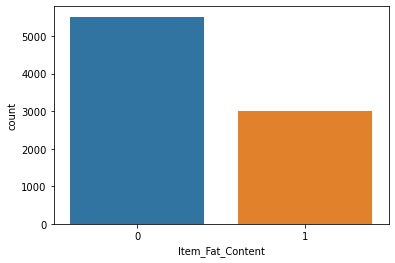

In [46]:
sns.countplot(train_data['Item_Fat_Content'])

Outlet_Location_Type : We see that Location is Tier 1, Tier 2 and Tier 3, We will use Label encoder to convert them as well

In [47]:
train_data['Outlet_Location_Type'] = le.fit_transform(train_data['Outlet_Location_Type'])

In [48]:
train_data['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Size : We see that Outlet_Size is either Small Medium or High. We will use Label Encoder to convert them as well

In [49]:
train_data['Outlet_Size'] = le.fit_transform(train_data['Outlet_Size'])

In [50]:
train_data['Outlet_Size'].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [51]:
set(train_data['Outlet_Identifier'])

{'OUT010',
 'OUT013',
 'OUT017',
 'OUT018',
 'OUT019',
 'OUT027',
 'OUT035',
 'OUT045',
 'OUT046',
 'OUT049'}

In [52]:
updated_Outlet_Identifier = {"OUT010": 10, "OUT013": 13, "OUT017": 17, "OUT018": 18, "OUT019": 19, 
                 "OUT027": 27, "OUT035": 35, "OUT045": 45, "OUT046": 46, "OUT049": 49}
data = [train_data]

for dataset in data:    
    dataset['Outlet_Identifier'] = dataset['Outlet_Identifier'].map(updated_Outlet_Identifier)
    dataset['Outlet_Identifier'] = dataset['Outlet_Identifier'].astype(int)

In [53]:
set(train_data['Outlet_Identifier'])

{10, 13, 17, 18, 19, 27, 35, 45, 46, 49}

In [54]:
set(train_data['Outlet_Type'])

{'Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3'}

In [55]:
train_data['Outlet_Type'] = le.fit_transform(train_data['Outlet_Type'])

In [56]:
train_data['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [57]:
train_data.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content
0,FDA15,9.30,0.016047,Dairy,249.8092,49,1999,1,0,1,3735.1380,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,18,2009,1,2,2,443.4228,1


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

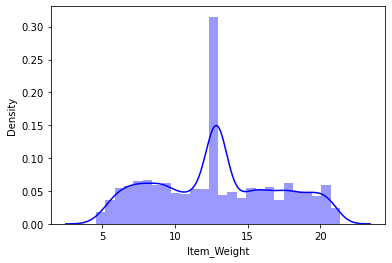

In [58]:
y = train_data['Item_Weight']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'blue')

Item weight lies between 0 to 21 and 75% of the data lies between 0 to 16 and 50% of the data lies between 0 to 12 gm

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

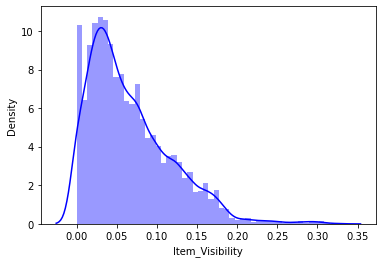

In [59]:
y = train_data['Item_Visibility']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'blue')

Item Visibility is rightly skewed when the values crosses 0.10

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

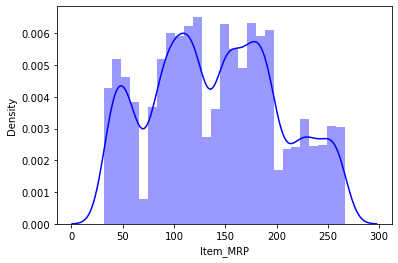

In [60]:
y = train_data['Item_MRP']
plt.figure(1);
sns.distplot(y, kde=True,color = 'blue')

Item_MRP starts from 31 and has maximum Item_MRP as 266 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

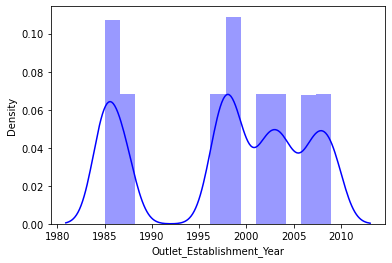

In [61]:
y = train_data['Outlet_Establishment_Year']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'blue')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

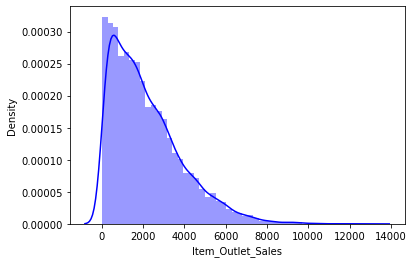

In [62]:
y = train_data['Item_Outlet_Sales']
plt.figure(1);
sns.distplot(y, kde=True,color = 'blue')

Item Outlet Sales starts from 33 and gets right skewed after 3101

In [63]:
#train_data["Qty_Sold"] = (train_data["Item_Outlet_Sales"]/train_data["Item_MRP"])
#train_data.head()

<AxesSubplot:>

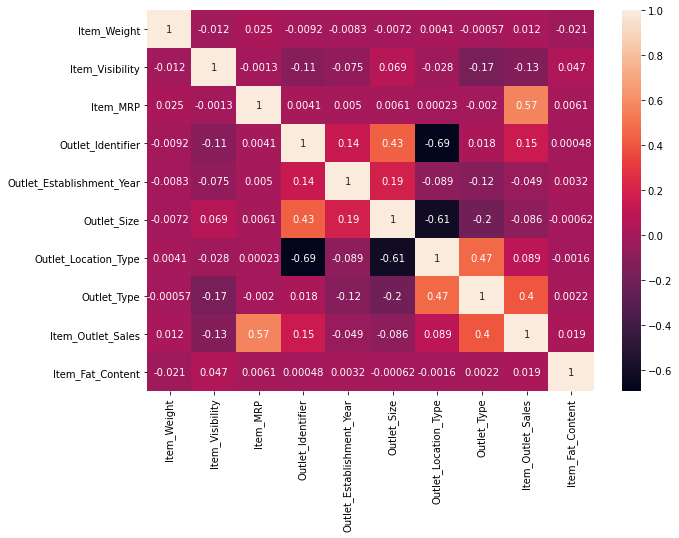

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(),annot=True)

After converting the data to Label Encoder, we see that the only a bit of relation is there between Item_Outlet_Sales and Item_MRP.
No more columns have highest correlation between them

# BoxPlot

In [65]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Fat_Content'],
      dtype='object')

We see that Item_Identifier is just an Index, so we can remove this column without hesitation

In [66]:
train_data.drop(['Item_Identifier'], axis = 1,inplace=True)

In [67]:
train_data

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content
0,9.300,0.016047,Dairy,249.8092,49,1999,1,0,1,3735.1380,0
1,5.920,0.019278,Soft Drinks,48.2692,18,2009,1,2,2,443.4228,1
2,17.500,0.016760,Meat,141.6180,49,1999,1,0,1,2097.2700,0
3,19.200,0.000000,Fruits and Vegetables,182.0950,10,1998,1,2,0,732.3800,1
4,8.930,0.000000,Household,53.8614,13,1987,0,2,1,994.7052,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,Snack Foods,214.5218,13,1987,0,2,1,2778.3834,0
8519,8.380,0.046982,Baking Goods,108.1570,45,2002,1,1,1,549.2850,1
8520,10.600,0.035186,Health and Hygiene,85.1224,35,2004,2,1,1,1193.1136,0
8521,7.210,0.145221,Snack Foods,103.1332,18,2009,1,2,2,1845.5976,1


In [68]:
dataToPlot= train_data.drop(['Item_Type'], axis = 1)

# checking the shape of the dataset
print(train_data.shape)

(8523, 11)


In [69]:
dataToPlot.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content
0,9.30,0.016047,249.8092,49,1999,1,0,1,3735.1380,0
1,5.92,0.019278,48.2692,18,2009,1,2,2,443.4228,1
2,17.50,0.016760,141.6180,49,1999,1,0,1,2097.2700,0
3,19.20,0.000000,182.0950,10,1998,1,2,0,732.3800,1
4,8.93,0.000000,53.8614,13,1987,0,2,1,994.7052,0


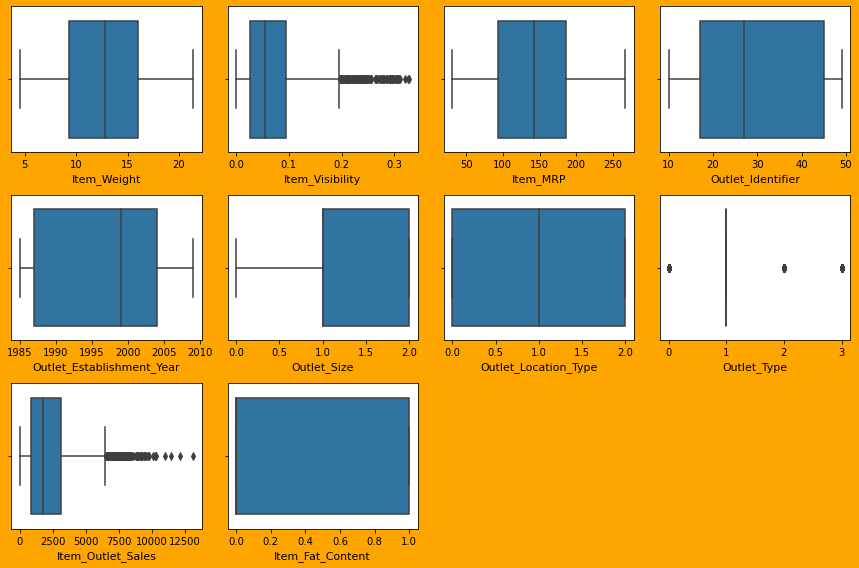

In [70]:
#Lets see data distribution
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

In [71]:
train_data.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Identifier            0.194661
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
Item_Fat_Content             0.616705
dtype: float64

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(dataToPlot))
z.shape

(8523, 10)

In [73]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [74]:
dataToPlot_new=dataToPlot[(z<3).all(axis=1)]
print(dataToPlot.shape)
print(dataToPlot_new.shape)

(8523, 10)
(8338, 10)


In [75]:
loss_percentage= ((8523-8338)/8523)*100
loss_percentage

2.170597207556025

We are not going to delete any data as our model can become biased because most of the outliers are in Item_Visibility and Item_Outlet sales

# Power Transform

In [76]:
from sklearn.preprocessing import power_transform
x=power_transform(dataToPlot,method='yeo-johnson')

In [77]:
train_data.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Identifier            0.194661
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
Item_Fat_Content             0.616705
dtype: float64

We dont see much skewness now after Power transformation

# Standard Scalar

In [78]:
x = train_data.drop(columns=['Item_Type','Item_Outlet_Sales'],axis=1)

# checking the shape of the dataset
print(x.shape)

(8523, 9)


In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)

In [80]:
# Finding variance Inflation factor in each scaled column i.e x.shape[1] (1/(1-R2)
# Age and Expereince, you can predict Salary, so Multi colinearity problem is there
# Thats why we first use Standard Scaler to standardise the data and then use vif

In [81]:
train_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Fat_Content'],
      dtype='object')

In [82]:
X_vif=train_data.drop(columns=['Item_Type','Item_Outlet_Sales'])
X_vif

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content
0,9.300,0.016047,249.8092,49,1999,1,0,1,0
1,5.920,0.019278,48.2692,18,2009,1,2,2,1
2,17.500,0.016760,141.6180,49,1999,1,0,1,0
3,19.200,0.000000,182.0950,10,1998,1,2,0,1
4,8.930,0.000000,53.8614,13,1987,0,2,1,0
...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,13,1987,0,2,1,0
8519,8.380,0.046982,108.1570,45,2002,1,1,1,1
8520,10.600,0.035186,85.1224,35,2004,2,1,1,0
8521,7.210,0.145221,103.1332,18,2009,1,2,2,1


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.001405,Item_Weight
1,1.066474,Item_Visibility
2,1.000822,Item_MRP
3,2.834628,Outlet_Identifier
4,1.112108,Outlet_Establishment_Year
5,1.727814,Outlet_Size
6,4.526361,Outlet_Location_Type
7,1.942170,Outlet_Type
8,1.002999,Item_Fat_Content


We dont see any multi collinearity problem here

In [84]:
train_data.head(2)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content
0,9.30,0.016047,Dairy,249.8092,49,1999,1,0,1,3735.1380,0
1,5.92,0.019278,Soft Drinks,48.2692,18,2009,1,2,2,443.4228,1


# One Hot Encoder

In [85]:
#One hot encoding
train_data=pd.get_dummies(train_data, columns=['Item_Type'],drop_first=False)

print(train_data.shape)

(8523, 26)


In [86]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,49,1999,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,18,2009,1,2,2,443.4228,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,49,1999,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,10,1998,1,2,0,732.3800,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,13,1987,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


# Rearrangement of Columns

In [87]:
train_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Fat_Content',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [88]:
train_data.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,49,1999,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,18,2009,1,2,2,443.4228,1,...,0,0,0,0,0,0,0,0,1,0


In [89]:
df = train_data[['Item_Weight', 'Item_Fat_Content','Item_Visibility', 'Item_MRP',             
                 'Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type',
                 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
                 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
                 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
                 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
                 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
                 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods','Item_Outlet_Sales']]
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Outlet_Sales
0,9.30,0,0.016047,249.8092,49,1999,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3735.1380
1,5.92,1,0.019278,48.2692,18,2009,1,2,2,0,...,0,0,0,0,0,0,0,1,0,443.4228
2,17.50,0,0.016760,141.6180,49,1999,1,0,1,0,...,0,0,0,1,0,0,0,0,0,2097.2700
3,19.20,1,0.000000,182.0950,10,1998,1,2,0,0,...,0,0,0,0,0,0,0,0,0,732.3800
4,8.93,0,0.000000,53.8614,13,1987,0,2,1,0,...,0,0,1,0,0,0,0,0,0,994.7052


In [90]:
df.shape

(8523, 26)

In [91]:
# iterating the columns 
for col in df.columns: 
    print(col)

Item_Weight
Item_Fat_Content
Item_Visibility
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Type_Baking Goods
Item_Type_Breads
Item_Type_Breakfast
Item_Type_Canned
Item_Type_Dairy
Item_Type_Frozen Foods
Item_Type_Fruits and Vegetables
Item_Type_Hard Drinks
Item_Type_Health and Hygiene
Item_Type_Household
Item_Type_Meat
Item_Type_Others
Item_Type_Seafood
Item_Type_Snack Foods
Item_Type_Soft Drinks
Item_Type_Starchy Foods
Item_Outlet_Sales


# Separating Target and Columns

In [92]:
df.shape

(8523, 26)

In [93]:
#Separating features and label
features = df.iloc[:,0:25].values
target = df.iloc[:,-1].values

In [94]:
print("features:",features.shape)
print("target:",target.shape)

features: (8523, 25)
target: (8523,)


# Train Test Split

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
from sklearn.metrics import accuracy_score

In [96]:
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=5)
lr.fit(X_train,y_train)
pred_train=lr.predict(X_train)
pred_test=lr.predict(X_test)

In [97]:
X_train.shape , X_test.shape,y_train.shape ,y_test.shape

((6818, 25), (1705, 25), (6818,), (1705,))

In [98]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [99]:
# calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_test))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_test))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print("r2_score",r2_score(y_test,pred_test))
print ("Cross Validation Score : ", (cross_val_score(lr,features,target,cv=5).mean())  )

mean_absolute_error : 905.161598627845
mean_squared_error :  1453524.7250208012
root_mean_squared_error :  1205.6221319388596
r2_score 0.5054660785519876
Cross Validation Score :  0.5094973933985409


In [100]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Train Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print("r2_score",r2_score(y_train,pred_train))
print ("Cross Validation Score : ", (cross_val_score(lr,features,target,cv=5).mean())  )

mean_absolute_error : 889.8556090739588
mean_squared_error :  1404086.597168889
root_mean_squared_error :  1184.9416007419475
r2_score 0.5166315149109313
Cross Validation Score :  0.5094973933985409


In [101]:
lr_data = {'Model': ['Linear Regression'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_test),'MSE':metrics.mean_squared_error(y_test, pred_test),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
           'R2 Score': r2_score(y_test,pred_test),
           'CV Score': (cross_val_score(lr,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))          
          }  

df_LR = pd.DataFrame(lr_data)  
df_LR

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Linear Regression,905.161599,1.453525e+06,1205.622132,0.505466,0.509497,-20.680531


# Ridge

In [102]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.9,max_iter=50, normalize=True)

ridgeReg.fit(X_train,y_train)
ridge_pred = ridgeReg.predict(X_test)

# # Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print("r2_score",r2_score(y_test,ridge_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, ridge_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, ridge_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print ("Cross Validation Score : ", (cross_val_score(ridgeReg,features,target,cv=5).mean()))

r2_score 0.3920936570808269
mean_absolute_error : 1030.891886805604
mean_squared_error :  1786746.7965448366
root_mean_squared_error :  1336.6924839112535
Cross Validation Score :  0.39877413389954613


In [103]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.1, max_iter=50,normalize=True)

ridgeReg.fit(X_train,y_train)
ridge_pred = ridgeReg.predict(X_test)
ridge_pred_train = ridgeReg.predict(X_train)

# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Train Data
print("r2_score",r2_score(y_train,ridge_pred_train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, ridge_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, ridge_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))
print ("Cross Validation Score : ", (cross_val_score(ridgeReg,features,target,cv=5).mean())  )

r2_score 0.5116936490565154
mean_absolute_error : 889.0259841600218
mean_squared_error :  1418430.0876501224
root_mean_squared_error :  1190.9786260257245
Cross Validation Score :  0.5054438557972041


In [104]:
ridge_data = {'Model': ['Ridge'], 
           'MAE': metrics.mean_absolute_error(y_test, ridge_pred),'MSE':metrics.mean_squared_error(y_test, ridge_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),
           'R2 Score': r2_score(y_test,ridge_pred),
           'CV Score': (cross_val_score(ridgeReg,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))-(np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))          
          }  

df_Ridge = pd.DataFrame(ridge_data)  
df_Ridge

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Ridge,908.79696,1.466755e+06,1211.096689,0.500965,0.505444,-20.118063


As we can see, as we increase the value of alpha, the magnitude of the coefficients decreases, where the values reaches to zero but not absolute zero.

We have to choose the value of alpha wisely by iterating it through a range of values and using the one which gives us the lowest error.

The difference between RMSE value of train and test data is more, This can be a biased model for our dataset

# Lasso

In [105]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.9,max_iter=50, normalize=True)

lassoReg.fit(X_train,y_train)
lassoReg_pred = lassoReg.predict(X_test)

# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print("r2_score",r2_score(y_test,lassoReg_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, lassoReg_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, lassoReg_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)))
print ("Cross Validation Score : ", (cross_val_score(lassoReg,features,target,cv=5).mean())  )

r2_score 0.49486808289626527
mean_absolute_error : 914.5856651901084
mean_squared_error :  1484674.1529026148
root_mean_squared_error :  1218.472056676974
Cross Validation Score :  0.5010786358176988


In [106]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1,max_iter=50, normalize=True)

lassoReg.fit(X_train,y_train)
lassoReg_pred = lassoReg.predict(X_test)
lasso_train=lassoReg.predict(X_train)

# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print("r2_score",r2_score(y_test,lassoReg_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, lassoReg_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, lassoReg_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)))
print ("Cross Validation Score : ", (cross_val_score(lassoReg,features,target,cv=5).mean()))

r2_score 0.5066327469464083
mean_absolute_error : 904.475660255775
mean_squared_error :  1450095.675397217
root_mean_squared_error :  1204.199184270284
Cross Validation Score :  0.5109139155597158


In [107]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Train Data
print("r2_score",r2_score(y_train,lasso_train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, lasso_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, lasso_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, lasso_train)))
print ("Cross Validation Score : ", (cross_val_score(lassoReg,features,target,cv=5).mean()))

r2_score 0.516132296080446
mean_absolute_error : 889.215717376409
mean_squared_error :  1405536.7257779345
root_mean_squared_error :  1185.5533415995817
Cross Validation Score :  0.5109139155597158


Difference between RMSE of train and test data is not that much, its in acceptable range but R2 Score and CV score are very low, so we will try to look into other model techniques

In [108]:
lasso_data = {'Model': ['Lasso'], 
           'MAE': metrics.mean_absolute_error(y_test, lassoReg_pred),'MSE':metrics.mean_squared_error(y_test, lassoReg_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)),
           'R2 Score': r2_score(y_test,lassoReg_pred),
           'CV Score': (cross_val_score(lassoReg,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, lasso_train)))-(np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)))
          }  

df_Lasso = pd.DataFrame(lasso_data)  
df_Lasso

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Lasso,904.47566,1.450096e+06,1204.199184,0.506633,0.510914,-18.645843


# Decision Tree Regression

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dt=DecisionTreeRegressor(criterion="mse",max_features="auto",min_samples_split= 7, splitter= "best")

In [111]:
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
pred_dt=dt.predict(X_test)
pred_dt_train=dt.predict(X_train)

In [112]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print("r2_score",r2_score(y_test,pred_dt))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_dt))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_dt))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_dt)))
print ("Cross Validation Score : ", (cross_val_score(dt,features,target,cv=5).mean()))

r2_score 0.27997129858398606
mean_absolute_error : 1002.2333869325513
mean_squared_error :  2116294.7066773
root_mean_squared_error :  1454.7490184486462
Cross Validation Score :  0.26819348566412893


In [113]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Train Data
print("r2_score",r2_score(y_train,pred_dt_train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_dt_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_dt_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_dt_train)))
print ("Cross Validation Score : ", (cross_val_score(dt,features,target,cv=5).mean()))

r2_score 0.9112738634159251
mean_absolute_error : 321.8348265131515
mean_squared_error :  257731.2817018263
root_mean_squared_error :  507.67241573856097
Cross Validation Score :  0.2703005850398327


In [114]:
print ("Difference between RMSE between Train data and Test data in Decision Tree is :",
      (np.sqrt(metrics.mean_squared_error(y_train, pred_dt_train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_dt)))
      )

Difference between RMSE between Train data and Test data in Decision Tree is : -947.0766027100852


In [115]:
decTree_data = {'Model': ['Decision Tree'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_dt),'MSE':metrics.mean_squared_error(y_test, pred_dt),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_dt)),
           'R2 Score': r2_score(y_test,pred_dt),
           'CV Score': (cross_val_score(dt,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_dt_train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_dt)))
          }  

df_DT = pd.DataFrame(decTree_data)  
df_DT

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Decision Tree,1002.233387,2.116295e+06,1454.749018,0.279971,0.263796,-947.076603


# Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [117]:
rf=RandomForestRegressor(criterion="mse",max_features="auto",n_estimators=100,bootstrap=True)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_RF=rf.predict(X_test)
pred_RF_train=rf.predict(X_train)

In [118]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print("r2_score",r2_score(y_test,pred_RF))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_RF))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_RF))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_RF)))
print ("Cross Validation Score : ", (cross_val_score(rf,features,target,cv=5).mean())  )

r2_score 0.5497965046392321
mean_absolute_error : 807.7744344328446
mean_squared_error :  1323229.577218102
root_mean_squared_error :  1150.317163750112
Cross Validation Score :  0.5515542899606661


In [119]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Train Data
print("r2_score",r2_score(y_train,pred_RF_train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_RF_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_RF_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_RF_train)))
print ("Cross Validation Score : ", (cross_val_score(rf,features,target,cv=5).mean()))

r2_score 0.9381355264840358
mean_absolute_error : 293.056918674098
mean_squared_error :  179703.64387464992
root_mean_squared_error :  423.9146657933055
Cross Validation Score :  0.5508492757058302


In [120]:
print ("Difference between RMSE between Train data and Test data in Random Forest is :",
      (np.sqrt(metrics.mean_squared_error(y_train, pred_RF_train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_RF)))
      )

Difference between RMSE between Train data and Test data in Random Forest is : -726.4024979568065


In [121]:
randomForest_data = {'Model': ['Random Forest'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_RF),'MSE':metrics.mean_squared_error(y_test, pred_RF),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_RF)),
           'R2 Score': r2_score(y_test,pred_RF),
           'CV Score': (cross_val_score(rf,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_RF_train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_RF)))
          }  

df_RF = pd.DataFrame(randomForest_data)  
df_RF

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Random Forest,807.774434,1.323230e+06,1150.317164,0.549797,0.552383,-726.402498


# Bagging Regression

In [122]:
from sklearn.ensemble import BaggingRegressor

In [123]:
br=BaggingRegressor(n_estimators=100,max_samples=100,max_features=1.0,bootstrap=True,bootstrap_features=False)

In [124]:
br.fit(X_train,y_train)
br.score(X_train,y_train)
pred_Bagging=rf.predict(X_test)
pred_Bagging_Train=rf.predict(X_train)

In [125]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print("r2_score",r2_score(y_test,pred_Bagging))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_Bagging))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_Bagging))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_Bagging)))
print ("Cross Validation Score : ", (cross_val_score(br,features,target,cv=5).mean())  )

r2_score 0.5497965046392321
mean_absolute_error : 807.7744344328446
mean_squared_error :  1323229.577218102
root_mean_squared_error :  1150.317163750112
Cross Validation Score :  0.5819685913076598


In [126]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Train Data
print("r2_score",r2_score(y_train,pred_Bagging_Train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_Bagging_Train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_Bagging_Train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_Bagging_Train)))
print ("Cross Validation Score : ", (cross_val_score(br,features,target,cv=5).mean())  )

r2_score 0.9381355264840358
mean_absolute_error : 293.056918674098
mean_squared_error :  179703.64387464992
root_mean_squared_error :  423.9146657933055
Cross Validation Score :  0.579902100962793


In [127]:
print ("Difference between RMSE between Train data and Test data in Bagging Regressor is :",
      (np.sqrt(metrics.mean_squared_error(y_train, pred_Bagging_Train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_Bagging)))
      )

Difference between RMSE between Train data and Test data in Bagging Regressor is : -726.4024979568065


In [128]:
bagging_data = {'Model': ['Bagging Regressor'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_Bagging),'MSE':metrics.mean_squared_error(y_test, pred_Bagging),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_Bagging)),
           'R2 Score': r2_score(y_test,pred_Bagging),
           'CV Score': (cross_val_score(br,features,target,cv=5).mean()),
            'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_Bagging_Train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_Bagging)))
          }  

df_Bagging = pd.DataFrame(bagging_data)  
df_Bagging

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Bagging Regressor,807.774434,1.323230e+06,1150.317164,0.549797,0.578307,-726.402498


# AdaBoost

In [129]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
ada.score(X_train,y_train)
pred_Ada=ada.predict(X_test)
pred_Ada_Train=ada.predict(X_train)

In [130]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print("r2_score",r2_score(y_test,pred_Ada))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_Ada))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_Ada))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_Ada)))
print ("Cross Validation Score : ", (cross_val_score(ada,features,target,cv=5).mean()))

r2_score 0.532154757024641
mean_absolute_error : 881.060731041137
mean_squared_error :  1375081.8673002508
root_mean_squared_error :  1172.6388477703827
Cross Validation Score :  0.48250618097075737


In [131]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Train Data
print("r2_score",r2_score(y_train,pred_Ada_Train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_Ada_Train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_Ada_Train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_Ada_Train)))
print ("Cross Validation Score : ", (cross_val_score(ada,features,target,cv=5).mean()))

r2_score 0.5559498539121468
mean_absolute_error : 859.7750558196819
mean_squared_error :  1289874.8632276973
root_mean_squared_error :  1135.7265794317298
Cross Validation Score :  0.509033663526225


In [132]:
ada_data = {'Model': ['AdaBoost Regressor'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_Ada),'MSE':metrics.mean_squared_error(y_test, pred_Ada),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_Ada)),
           'R2 Score': r2_score(y_test,pred_Ada),
           'CV Score': (cross_val_score(ada,features,target,cv=5).mean()),
            'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_Ada_Train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_Ada)))
          }

df_Ada = pd.DataFrame(ada_data)  
df_Ada

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,AdaBoost Regressor,881.060731,1.375082e+06,1172.638848,0.532155,0.457611,-36.912268


# Gradient BOOSTING

In [133]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
ada.score(X_train,y_train)
pred_Gradient=gbr.predict(X_test)
pred_Gradient_Train=gbr.predict(X_train)

In [134]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Test Data
print("r2_score",r2_score(y_test,pred_Gradient))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_Gradient))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_Gradient))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_Gradient)))
print ("Cross Validation Score : ", (cross_val_score(gbr,features,target,cv=5).mean()))

r2_score 0.5821358973504627
mean_absolute_error : 770.3885530253503
mean_squared_error :  1228178.2473511933
root_mean_squared_error :  1108.2320367825473
Cross Validation Score :  0.5944826891003627


In [135]:
# Calculate MAE, MSE, RMSE,R2 Score and Cross Validation Score on Train Data
print("r2_score",r2_score(y_train,pred_Gradient_Train))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_Gradient_Train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_Gradient_Train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_Gradient_Train)))
print ("Cross Validation Score : ", (cross_val_score(gbr,features,target,cv=5).mean()))

r2_score 0.6380513580642906
mean_absolute_error : 722.9701837087524
mean_squared_error :  1051386.7839599953
root_mean_squared_error :  1025.3715345961166
Cross Validation Score :  0.5945303183824409


In [136]:
gradient_data = {'Model': ['Gradient Boosting Regressor'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_Gradient),'MSE':metrics.mean_squared_error(y_test, pred_Gradient),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_Gradient)),
           'R2 Score': r2_score(y_test,pred_Gradient),
           'CV Score': (cross_val_score(gbr,features,target,cv=5).mean()),
           'RMSE(train-test)': (np.sqrt(metrics.mean_squared_error(y_train, pred_Gradient_Train)))-(np.sqrt(metrics.mean_squared_error(y_test, pred_Gradient)))
                 
          }  

df_Gradient = pd.DataFrame(gradient_data)  
df_Gradient

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
0,Gradient Boosting Regressor,770.388553,1.228178e+06,1108.232037,0.582136,0.594537,-82.860502


In [137]:
modelDF=pd.concat([df_LR,df_Ridge,df_Lasso,df_DT,df_RF,df_Bagging,df_Ada,df_Gradient]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF.sort_values(by='R2 Score', ascending=False)

,Model,MAE,MSE,RMSE,R2 Score,CV Score,RMSE(train-test)
7,Gradient Boosting Regressor,770.388553,1.228178e+06,1108.232037,0.582136,0.594537,-82.860502
4,Random Forest,807.774434,1.323230e+06,1150.317164,0.549797,0.552383,-726.402498
5,Bagging Regressor,807.774434,1.323230e+06,1150.317164,0.549797,0.578307,-726.402498
6,AdaBoost Regressor,881.060731,1.375082e+06,1172.638848,0.532155,0.457611,-36.912268
2,Lasso,904.475660,1.450096e+06,1204.199184,0.506633,0.510914,-18.645843
0,Linear Regression,905.161599,1.453525e+06,1205.622132,0.505466,0.509497,-20.680531
1,Ridge,908.796960,1.466755e+06,1211.096689,0.500965,0.505444,-20.118063
3,Decision Tree,1002.233387,2.116295e+06,1454.749018,0.279971,0.263796,-947.076603


In [138]:
modelDF.RMSE.sort_values()

7    1108.232037
4    1150.317164
5    1150.317164
6    1172.638848
2    1204.199184
0    1205.622132
1    1211.096689
3    1454.749018
Name: RMSE, dtype: float64

# It seems like Gradient Boosting doing better than others
# So lets Do grid search on to tune hyper parameter

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
gb=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9] ,'min_impurity_decrease':[0.00001,0.0]}]
gs=GridSearchCV(gb,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)
print(gs.best_params_)

{'max_leaf_nodes': 9, 'min_impurity_decrease': 1e-05, 'min_samples_split': 5}


In [141]:
gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_leaf_nodes=9,
                          min_impurity_decrease=1e-05, min_samples_split=5,
                          n_estimators=200)

In [142]:
gb=gs.best_estimator_

In [143]:
gradientboost_pred=gb.predict(X_test)

In [144]:
print("r2_score",r2_score(y_test,gradientboost_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, gradientboost_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, gradientboost_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, gradientboost_pred)))

r2_score 0.5710891855491813
mean_absolute_error : 811.6572058544616
mean_squared_error :  1260646.5332198895
root_mean_squared_error :  1122.7851678838163


We see that Gradient Boost Regressor is performing a bit better before HyperTuning, So we will use Gradient Boost Regressor for our problem

# Saving the model

In [145]:
from joblib import dump , load
dump(gbr,'BigMartSales.joblib')
gbr_load=load('BigMartSales.joblib')

In [146]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'BigMartSales.joblib')

In [147]:
import joblib
joblib.dump(gbr, filename) 
#['...BigMartSales.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmp5c4bqrz9\\BigMartSales.joblib']

In [148]:
joblib.load(filename)

GradientBoostingRegressor()

# Test Data Importing

In [149]:
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [150]:
Item_Identifier=test['Item_Identifier']

In [151]:
Outlet_Identifier=test['Outlet_Identifier']

In [152]:
test.shape

(5681, 11)

In [153]:
test['Item_Outlet_Sales'] = 0

# Test Data Preprocessing

In [154]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Outlet_Sales
0,9.30,0,0.016047,249.8092,49,1999,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3735.1380
1,5.92,1,0.019278,48.2692,18,2009,1,2,2,0,...,0,0,0,0,0,0,0,1,0,443.4228


In [155]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [156]:
test.Item_Weight = test.Item_Weight.fillna(train_data.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna('Medium')

In [157]:
updated_Outlet_Identifier = {"OUT010": 10, "OUT013": 13, "OUT017": 17, "OUT018": 18, "OUT019": 19, 
                 "OUT027": 27, "OUT035": 35, "OUT045": 45, "OUT046": 46, "OUT049": 49}
data = [test]

for dataset in data:
    dataset['Outlet_Identifier'] = dataset['Outlet_Identifier'].map(updated_Outlet_Identifier)
    dataset['Outlet_Identifier'] = dataset['Outlet_Identifier'].astype(int)

In [158]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])
test['Outlet_Type'] = le.fit_transform(test['Outlet_Type'])

In [159]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.75,1,0.007565,Snack Foods,107.8622,49,1999,1,0,1,0
1,FDW14,8.30,4,0.038428,Dairy,87.3198,17,2007,1,1,1,0


In [160]:
test.drop(columns=['Item_Identifier'],axis=1,inplace=True)

In [161]:
test=pd.get_dummies(test, columns=['Item_Type'],drop_first=False)

print(test.shape)

(5681, 26)


In [162]:
df.shape

(8523, 26)

In [163]:
test.shape

(5681, 26)

In [164]:
df_test = test[['Item_Weight', 'Item_Fat_Content','Item_Visibility', 'Item_MRP',             
                 'Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type',
                 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
                 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
                 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
                 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
                 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
                 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods','Item_Outlet_Sales']]
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Outlet_Sales
0,20.750000,1,0.007565,107.8622,49,1999,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,8.300000,4,0.038428,87.3198,17,2007,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,1,0.099575,241.7538,10,1998,1,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7.315000,1,0.015388,155.0340,17,2007,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,12.857645,2,0.118599,234.2300,27,1985,1,2,3,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
test.drop(['Item_Outlet_Sales'], axis = 1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,1,0.007565,107.8622,49,1999,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,4,0.038428,87.3198,17,2007,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,1,0.099575,241.7538,10,1998,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,1,0.015388,155.0340,17,2007,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,12.857645,2,0.118599,234.2300,27,1985,1,2,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,141.3154,46,1997,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5677,7.600000,2,0.142991,169.1448,18,2009,1,2,2,0,...,0,0,0,0,0,0,0,0,0,1
5678,10.000000,1,0.073529,118.7440,45,2002,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
5679,15.300000,2,0.000000,214.6218,17,2007,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
del test['Item_Outlet_Sales']

# Lets predict the Item Outlet Sales for Our Test data using the best model(Gradient Boost Regressor) which we saved

In [167]:
predict=gbr.predict(test)

In [168]:
predict.shape

(5681,)

In [169]:
predict

array([1674.66290427, 1398.14225392,  628.96771023, ..., 1899.80505926,
       3694.54330752, 1284.73946896])

In [170]:
df_Submission=pd.DataFrame(predict)

In [171]:
df_Submission.rename(columns={0: "Item_Outlet_Sales"}, errors="raise",inplace=True)

In [172]:
df_Submission.head(2)

,Item_Outlet_Sales
0,1674.662904
1,1398.142254


Export to csv

In [173]:
df_Submission.to_csv(r'C:\Users\mum1user\DataTrained\Projects\Submission.csv')

Lets read the data which is export into csv now

In [174]:
sample_data = pd.read_csv(r'C:\Users\mum1user\DataTrained\Projects\Submission.csv')
sample_data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
sample_data.head()

,Item_Outlet_Sales
0,1674.662904
1,1398.142254
2,628.967710
3,2512.182275
4,5842.841220


# Combine all to DataFrame

In [175]:
df_Outlet_Identifier=pd.DataFrame(Outlet_Identifier)

In [176]:
df_Item_Identifier=pd.DataFrame(Item_Identifier)

In [177]:
model_testDF = pd.concat([df_Item_Identifier,df_Outlet_Identifier,df_Submission], axis=1, join='inner')

In [178]:
model_testDF

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1674.662904
1,FDW14,OUT017,1398.142254
2,NCN55,OUT010,628.967710
3,FDQ58,OUT017,2512.182275
4,FDY38,OUT027,5842.841220
...,...,...,...
5676,FDB58,OUT046,2278.066107
5677,FDD47,OUT018,2408.598739
5678,NCO17,OUT045,1899.805059
5679,FDJ26,OUT017,3694.543308


We have successfully predicted the prices of our Test Data which is above